## overview

In [1]:
# default package
import dataclasses as dc
import logging
import os
import pathlib
import random
import sys
import tempfile
from urllib.request import urlretrieve

import IPython

In [2]:
# third party package
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap
import xgboost
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(), "../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [6]:
# graph setting
sns.set()
font_path = "/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf"
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams["font.family"] = font_prop.get_name()

In [7]:
# javascript
shap.initjs()

## load data

In [8]:
X, y = shap.datasets.boston()

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## train

In [11]:
model = xgboost.XGBRegressor().fit(X_train, y_train)

## shap

In [12]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

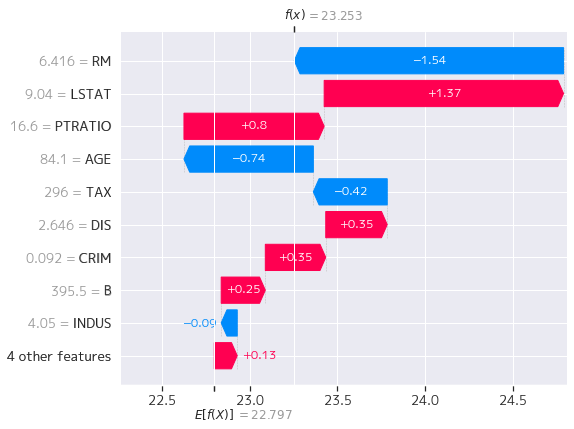

In [13]:
# 局所、waterfall
shap.plots.waterfall(shap_values[0])

In [14]:
# 局所
shap.plots.force(
    explainer.expected_value,
    shap_values=shap_values.values[0],
    features=X_test.values[0],
    feature_names=X_test.columns,
)

In [15]:
# 大域
shap.plots.force(explainer.expected_value,shap_values.values)

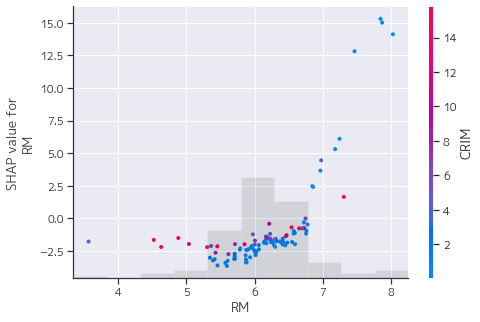

In [16]:
# 大域, dependence plot(特徴量 vs その特徴量のシャープレイ値)
shap.plots.scatter(shap_values[:, "RM"], color=shap_values)

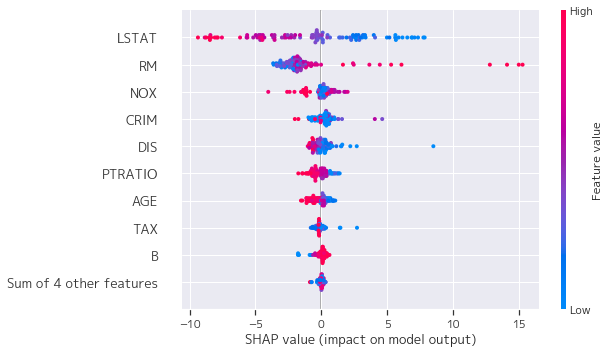

In [17]:
# 大域, summary plot
shap.plots.beeswarm(shap_values)

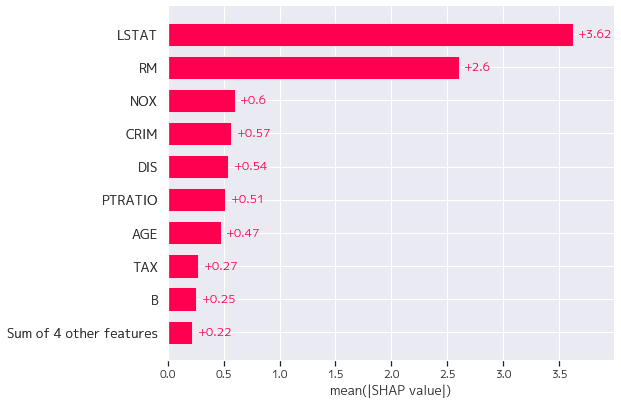

In [18]:
# 大域、特徴量重要度
shap.plots.bar(shap_values)